# Лабораторная работа № 3: НУ и СНУ
# Клименко Виталий Б01-203
---

## Цель работы:

1. Сконструировать МПИ для разных корней. 
2. Отыскать корни методом Ньютона.

## Возьму 12.3(и) в качестве НУ

\begin{equation}
    x^2 - \frac{e^x}{5} = 0
\end{equation}

## и 12.4(б) в качестве СНУ

\begin{cases}
    \tan{(xy + 0.4)} = x^2 \\
    0.6 \cdot x^2 + 2 y^2 = 1
\end{cases}

---


## Нелинейное уравнение

\begin{equation*}
f(x) = x^2 - \frac{e^x}{5}
\end{equation*}

\begin{equation*}
f(0) = -\frac{1}{5} < 0
\end{equation*}

\begin{equation*}
f(1) = 1 - \frac{e}{5} > 0
\end{equation*}

\begin{equation*}
f(-1) = 1 - \frac{1}{5e} > 0
\end{equation*}

Получается, что у заданного уравнения есть кореь на интервале (-1, 0) и корень на интервале (0, 1). В силу графического решения можно сделать вывод, что на этих интервалах по одному корню и у этого уравнения нет больше никаких других.

### Метод постоянной итерации

\begin{equation*}
    x^2 - \frac{e^x}{5} = 0 \iff x^2 = \frac{e^x}{5} \iff x = \sqrt{\frac{e^x}{5}}
\end{equation*}

Допустим:
\begin{equation*}
    g(x_k) = x_{k + 1} = \sqrt{\frac{e^{x_k}}{5}}
\end{equation*}

\begin{equation*}
    |g'(x_k)| = \frac{1}{2}\sqrt{\frac{e^{x_k}}{5}}
\end{equation*}

Так как $|g'(0)| \approx 0.22$, $|g'(1)| \approx 0.37$ и $|g'(x_k)|$ это монотонная функция, то:
\begin{equation*}
    \forall x \in [0; 1] \hookrightarrow |g'(x)| < 1
\end{equation*}

Таким образом, мы можем использовать $g(x_k)$ в методе постоянной итерации, чтобы вычислить корень, принадлежащий интервалу (0; 1).
Последовательность ${x_k}$ сходится к этому корню при любом начальном $x_0$ с интервала (0; 1). Буду использовать $x_0 = 0.5$.

Аналогично доказывается, что $h(x_k) = -g(x_k)$ может быть использовано для МПИ, чтобы вычислить корень на интервале (-1; 0). Аналогично возьму $x_0 = 0.5$.

In [1]:
import numpy as np

def g_func (x):
    return np.sqrt (np.power (np.e, x) * 0.2)

def h_func (x):
    return -g_func (x)

def MCI (f, x_0, n_iters):

    for k in range(0, n_iters):
        x_0 = f(x_0)

    return x_0


### Метод Ньютона

Проверю, что метод Ньютона применим для этого уравнения:

\begin{equation*}
    f'(x) = 2x - \frac{e^x}{5};\ \ \ f''(x) = 2 - \frac{e^x}{5}
\end{equation*}

1) Корень принадлежит интервалу (-1; 0)

    - $f''(x)$ непрерывна на отрезке [-1; 0];
    - Уже было показано, что $f(-1) \cdot f(0) < 0$;
    - Поскольку $f''(x)$ - монотонно убывающая функция, $f''(-1) = 2 - \frac{1}{5e} > 0$ и
      $f''(0) = 2 - \frac{1}{5} > 0$, мы видим что
      \begin{equation*}
          \forall x \in [-1; 0] \hookrightarrow  f''(x) > 0
      \end{equation*}
      Следовательно, $f'(x)$ монотонно возраствает на [-1; 0]. А также
      $f'(-1) = -2 - \frac{1}{5e} < 0$ и $f'(0) = -\frac{1}{5} < 0$, можно сделать вывод, что
      \begin{equation*}
          \forall x \in [-1; 0] \hookrightarrow f'(x) < 0
      \end{equation*}
    - Если выбрать $x_0 = -0.1$, то $f(x_0) \approx -0.17$, $f''(x_0) \approx 1.82$ $\implies$
      $f(x_0)f''(x_0) < 0$

    Таким образом, доказал, что метод Ньютона применим для вычисления корня на интервале (-1; 0) с начальным $x_0 = -0.1$.

2) Корень принадлежит интервалу (0; 1)

    $\exists x^* \in (0; 1): f'(x^*) = 0$ поэтому $f'(0) < 0$, $f'(1) > 0$. Поэтому можно выбрать  $[a; b] \subset [0; 1]: f(a)f(b) < 0, \forall x \in [a; b] \hookrightarrow f'(x) \neq 0$.

    Допустим $[a; b] = [0.2; 1]$.

    - Понятное дело, что $f''(x)$ непрерывна на [0.2; 1];
    - $f(0.2) = 0.2^2 - \frac{e^{0.2}}{5} \approx -0.2 < 0$, $f(1) > 0$ $\implies$ $f(0.2)f(1) < 0$
    - В силу того, что $f''(x)$ - монотонно убывающая функция, то $f''(0.2) \approx 1.76 > 0$ и
      $f''(1) \approx 1.45 > 0$, видно, что
      \begin{equation*}
          \forall x \in [-1; 0] \hookrightarrow  f''(x) > 0
      \end{equation*}
      Следовательно, $f'(x)$ это монотонно возрастающая функция на [0.2; 1]. А также
      $f'(0.2) \approx 0.16 > 0$ и $f'(1) \approx 1.46 > 0$, поэтому
      \begin{equation*}
          \forall x \in [0.2; 1] \hookrightarrow f'(x) > 0
      \end{equation*}
    - Если выбрать $x_0 = 0.5$, то $f(x_0) \approx -0.08$, $f''(x_0) \approx 1.67$ $\implies$
      $f(x_0)f''(x_0) < 0$

    Таким образом, доказал, что метод Ньютона применим для вычисления корня на интервале (0.2; 1) с начальным $x_0 = 0.5$.

In [2]:
def func (x):
    return x**2 - np.exp(x) / 5

def d_func (x):
    return 2 * x - np.exp(x) / 5

def newtons_method (f, d_f, x_0, n_iters):

    for k in range(0, n_iters):
        x_0 = x_0 - f (x_0) / d_f (x_0)

    return x_0

## Результаты

MCI:
- x_0 = 0.5 ==> x = 0.6052671213104069
- x_0 = -0.1 ==> x = -0.37141773843670456

Newton's method:
- x_0 = 0.5 ==> x = 0.6052671213146185
- x_0 = -0.1 ==> x = -0.37141775245932274


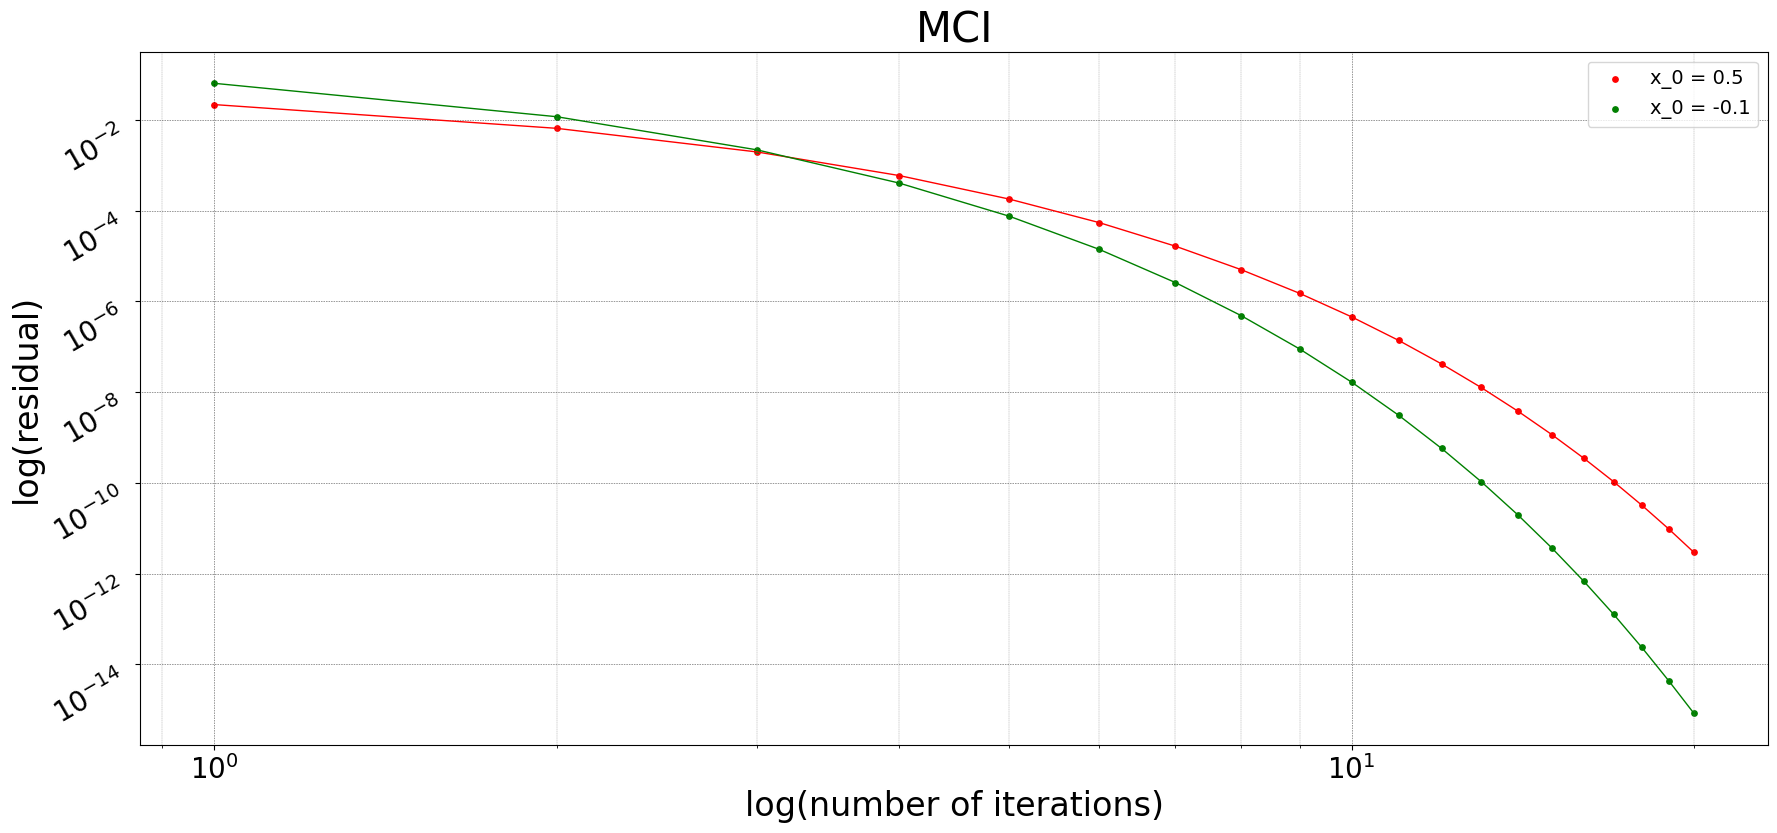

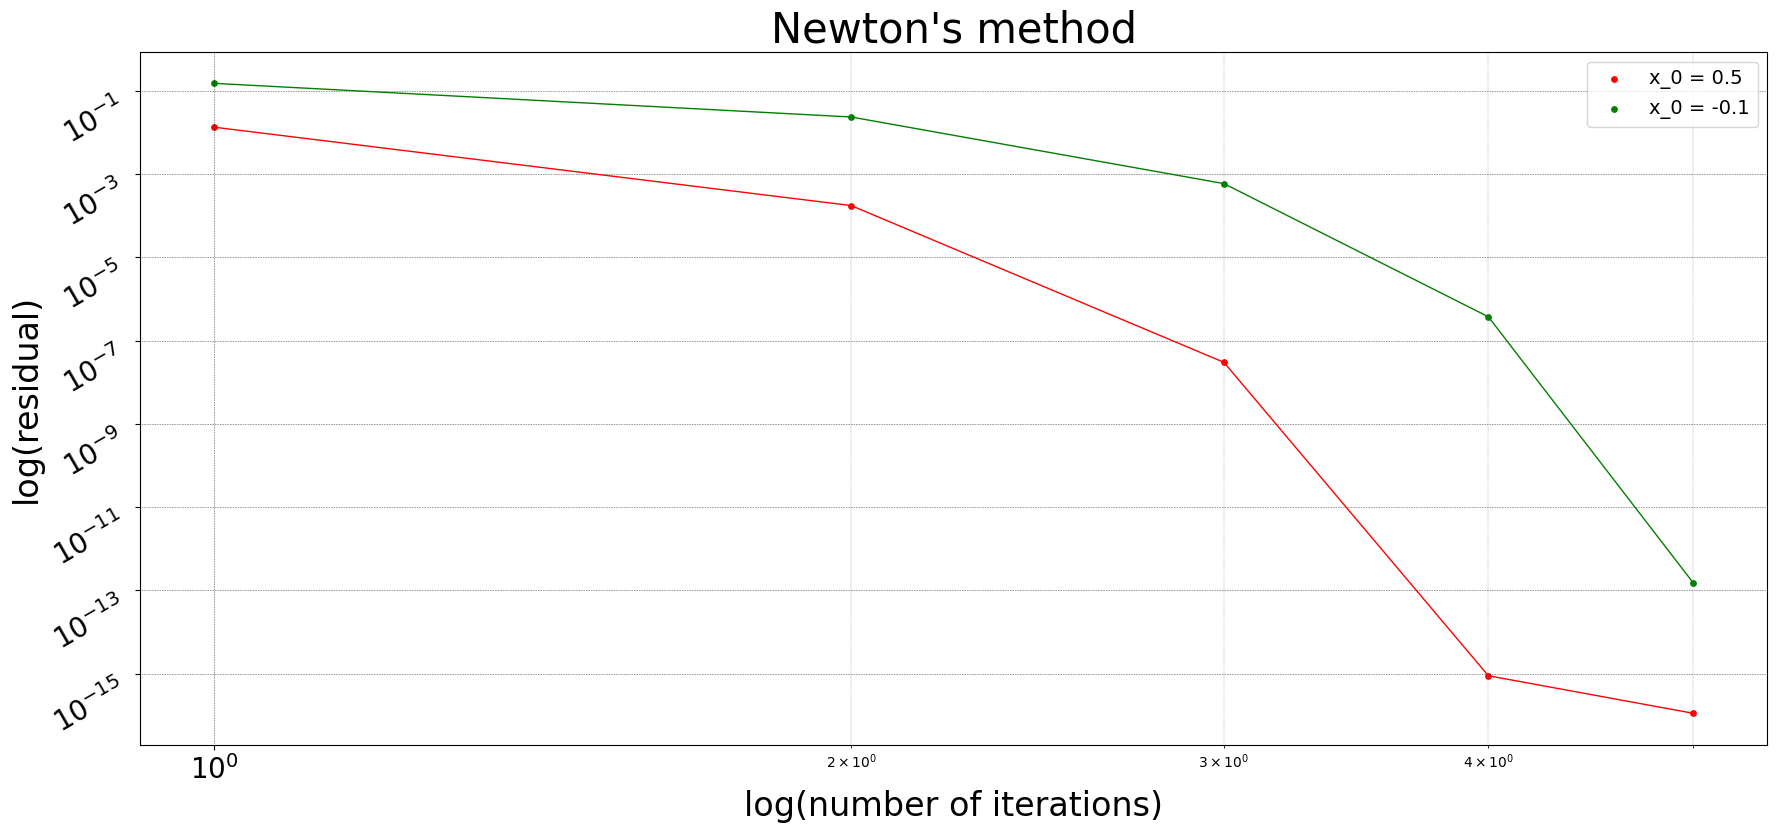

In [3]:
from matplotlib import pyplot as plt

class Iter_Method:
    def __init__(self, f, x_0, color):
        self.func_ = f
        self.start_ = x_0
        self.color_ = color

class Newtons_Method:
    def __init__(self, f, df, x_0, color):
        self.func_ = f
        self.derivative_ = df
        self.start_ = x_0
        self.color_ = color

def equation_residual_for_iteration (f, x_0, n_iters):
    res = MCI(f, x_0, n_iters)
    return abs (MCI(f, res, 1) - res)

def equation_residual_for_newton (f, df, x_0, n_iters):
    res = newtons_method(f, df, x_0, n_iters)
    return abs (newtons_method(f, df, res, 1) - res)

def dump_MCI (n_iters):

    roots = [Iter_Method(g_func, 0.5, "red"),
             Iter_Method(h_func, -0.1, "green")]
    iters = np.arange(1, n_iters + 1)
    for root in roots:
        residuals = []
        for i in iters:
            residuals.append(equation_residual_for_iteration(root.func_, root.start_, i))

        plt.scatter (iters, residuals, s = 15, color = root.color_, label=f"x_0 = {root.start_}")
        plt.plot (iters, residuals, color=root.color_, linewidth = 1)

def dump_newtons_method (n_iters):

    roots = [Newtons_Method(func, d_func, 0.5, "red"),
             Newtons_Method(func, d_func, -0.1, "green")]
    iters = np.arange(1, n_iters + 1)
    for root in roots:
        residuals = []
        for i in iters:
            residuals.append(equation_residual_for_newton(root.func_, root.derivative_, root.start_, i))

        plt.scatter (iters, residuals, s = 15, color = root.color_, label=f"x_0 = {root.start_}")
        plt.plot (iters, residuals, color=root.color_, linewidth = 1)

def show_results(method_name, dump_func, n_iters):

    plt.figure (figsize = (21, 9), dpi = 100)
    plt.title(method_name, fontsize=30)

    plt.xscale("log")
    plt.yscale("log")

    plt.xlabel("log(number of iterations)", fontsize = 24)
    plt.xticks (fontsize = 20, ha = "center", va = "top")

    plt.ylabel("log(residual)", fontsize = 24)
    plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

    dump_func(n_iters)

    plt.legend (loc = "best", fontsize = 14)

    plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
    plt.minorticks_on()
    plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

    plt.show()


print ("MCI:")
print (f"- x_0 = 0.5 ==> x = {MCI(g_func, 0.5, 20)}")
print (f"- x_0 = -0.1 ==> x = {MCI(h_func, -0.1, 10)}")

print ("\nNewton's method:")
print (f"- x_0 = 0.5 ==> x = {newtons_method(func, d_func, 0.5, 5)}")
print (f"- x_0 = -0.1 ==> x = {newtons_method(func, d_func, -0.1, 5)}")

show_results("MCI", dump_MCI, 20)
show_results("Newton's method", dump_newtons_method, 5)

## Нелинейная система уравнений

### Метод постоянной итерации

В силу чётности обеих уравнений системы: если пара $(x_0, y_0)$ есть решение, то $(-x_0, -y_0)$ также является решением.
Поэтому ищу решения с $y_0 \geq 0$.

Перепишу данную систему:

\begin{cases}
    x = \pm\sqrt{\frac{1 - 2y^2}{0.6}} \\
    y = \frac{1}{x}(\arctan{(x^2)} - 0.4)
\end{cases}

Сконструирую МПИ следующим образом:
\begin{cases}
    x_{k + 1} = \pm\sqrt{\frac{1 - 2y_k^2}{0.6}}\\
    y_{k + 1} = \frac{1}{x_k}(\arctan{(x_k^2)} - 0.4)
\end{cases}

\begin{equation*}
    \varphi_1(x_k, y_k) =
    \left|\frac{\partial x_{k + 1}}{\partial x_k}\right| \equiv 0
\end{equation*}

\begin{equation*}
    \varphi_2(y_k) =
    \left|\frac{\partial x_{k + 1}}{\partial y_k}\right| =
    \frac{10|y_k|}{3}\sqrt{\frac{0.6}{1 - 2y_k^2}}
\end{equation*}

\begin{equation*}
    \varphi_3(x_k) =
    \left|\frac{\partial y_{k + 1}}{\partial x_k}\right| =
    \left|\frac{2}{1 + x_k^4} -\frac{1}{x_k^2}(\arctan{(x_k^2)} - 0.4)\right|
\end{equation*}

\begin{equation*}
    \varphi_4(x_k, y_k) =
    \left|\frac{\partial y_{k + 1}}{\partial y_k}\right| \equiv 0
\end{equation*}

Рассмотрю $\varphi_2(y_k)$:
\begin{equation*}
    \varphi_2(y_k) \leq 1 \iff
    \frac{10|y_k|}{3} \leq \sqrt{\frac{1 - 2y_k^2}{0.6}} \iff
    \frac{100y_k^2}{9} \leq \frac{1 - 2y_k^2}{0.6} \iff
    60y_k^2 \leq 9 - 18y_k^2 \iff
    |y| \leq \frac{3}{\sqrt{78}} \approx 0.34
\end{equation*}

Если воспользоваться графическим решением, то можно увидеть, что ни один корень не находится в пределах найденного диапазона. Это означает, что
МПИ не гарантирует сходимость к какому-либо решению системы.

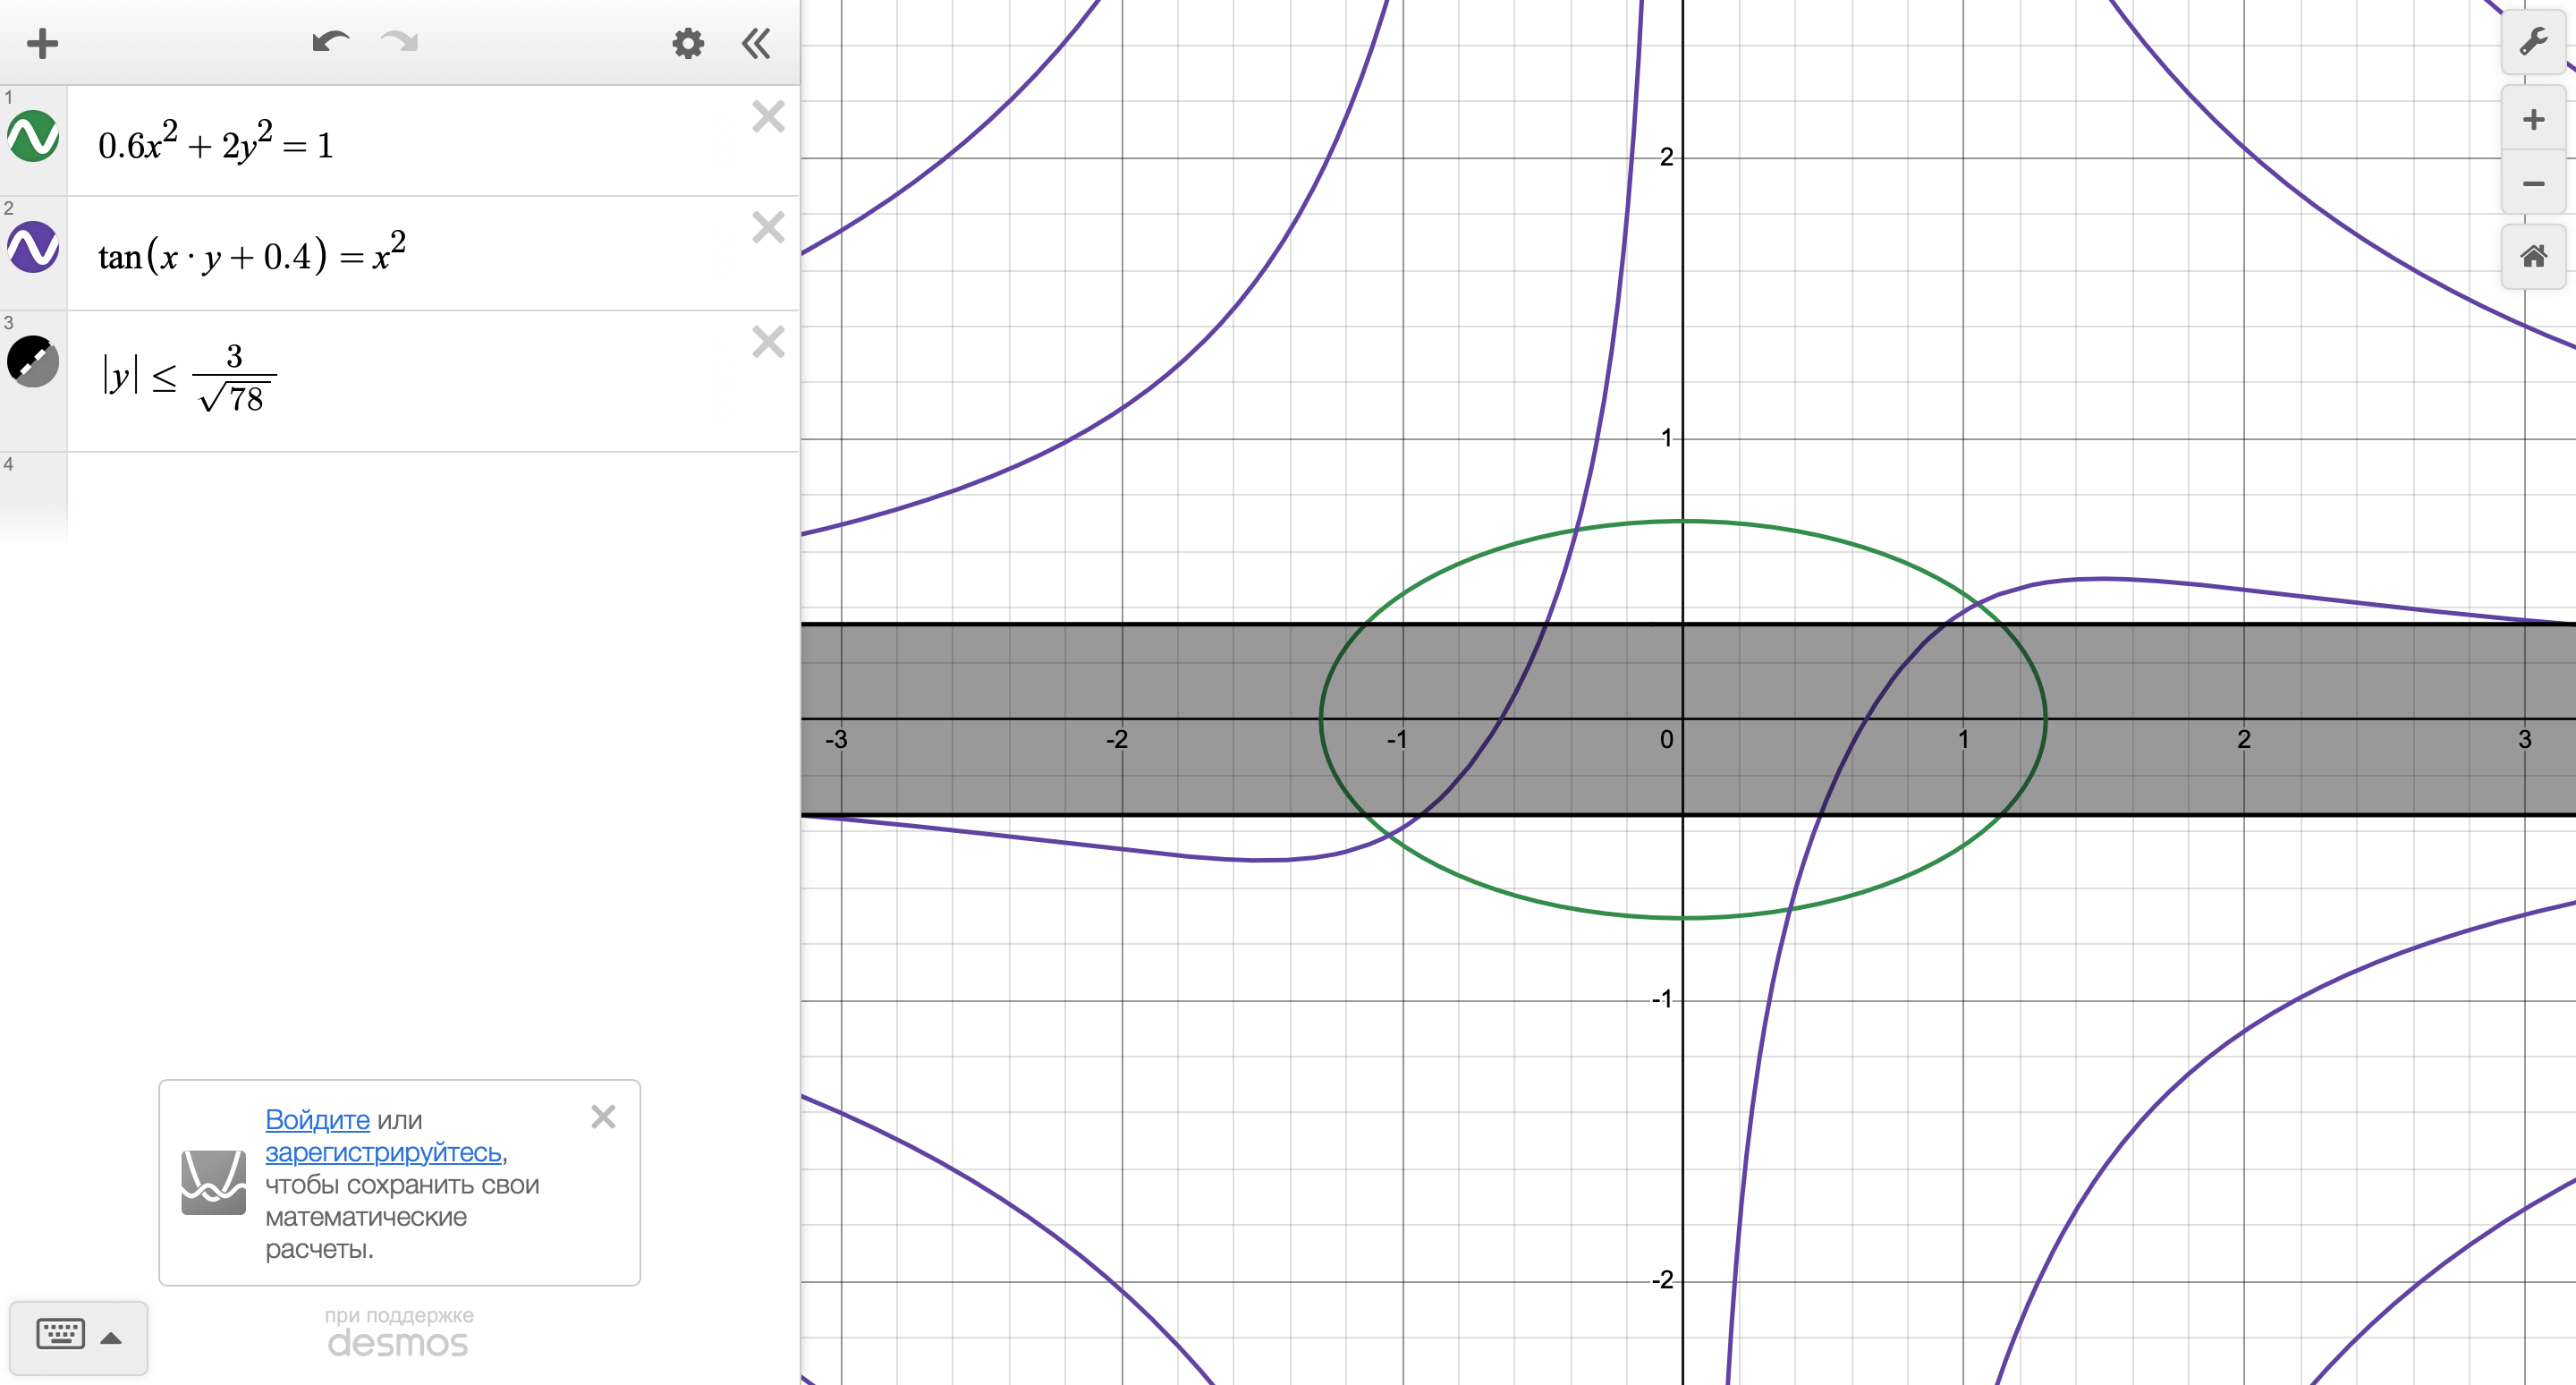

Попробую применить МПИ(не повторять в домашних условиях). Судя по графическому решению можно взять $(x_1, y_1) = (1.05, 0.4)$ в качестве начальной точки

In [4]:
def positive_new_x (x, y):
    return np.sqrt((1 - 2 * y**2) / 0.6)

def negative_new_x (x, y):
    return -positive_new_x (x, y)

def new_y (x, y):
    return (np.arctan(x**2) - 0.4) / x

def MCI_for_system(f, g, x_0, y_0, n_iters):
    x = x_0
    y = y_0
    for k in range (0, n_iters):
        x = f(x, y)
        y = g(x, y)

    return np.array([x, y])

Как можно увидеть, МПИ сходится к корням в первом и третьем квадрантах и не сходится к корням во втором и четвертом квадрантах.

### Метод Ньютона

Перепишу заданную систему:
\begin{cases}
    f_1(x, y) := \tan{(xy + 0.4)} - x^2 = 0\\
    f_2(x, y) := 0.6 \cdot x^2 + 2 y^2 - 1 = 0
\end{cases}

\begin{equation}
    \frac{\partial f_1}{\partial x} = \frac{y}{\cos^2{(xy + 0.4)}} - 2x;\
    \frac{\partial f_1}{\partial y} = \frac{x}{\cos^2{(xy + 0.4)}};\
    \frac{\partial f_2}{\partial x} = 1.2 \cdot x;\
    \frac{\partial f_2}{\partial y} = 4y
\end{equation}

Получается, что:
\begin{equation*}
    \begin{pmatrix}
        x_{k + 1} \\
        y_{k + 1}
    \end{pmatrix} =
    \begin{pmatrix}
        x_k \\
        y_k
    \end{pmatrix} -
    \begin{pmatrix}
        \frac{y_k}{\cos^2{(x_ky_k + 0.4)}} - 2x_k &  \frac{x_k}{\cos^2{(x_ky_k + 0.4)}}  \\
        1.2 \cdot x_k                             &  4y_k                                \\
    \end{pmatrix}^{-1} \cdot
    \begin{pmatrix}
        \tan{(x_ky_k + 0.4)} - x_k^2 \\
        0.6 \cdot x_k^2 + 2 y_k^2 - 1
    \end{pmatrix}
\end{equation*}

In [5]:
def a_11 (x, y):
    return (y / (np.cos(x * y + 0.4) ** 2)) - 2 * x

def a_12 (x, y):
    return (x / (np.cos(x * y + 0.4) ** 2))

def a_21 (x):
    return 1.2 * x

def a_22 (y):
    return 4 * y

def f_1 (x, y):
    return np.tan(x * y + 0.4) - x**2

def f_2 (x, y):
    return 0.6 * x**2 + 2 * y**2 - 1

def jacobi_matrix (X):
    return np.array([[a_11(X[0], X[1]), a_12(X[0], X[1])], [a_21(X[0]), a_22(X[1])]])

def newtons_method_for_system(x_0, y_0, n_iters):

    X = np.array([x_0, y_0])

    for k in range(0, n_iters):
        F = np.array([f_1(X[0], X[1]), f_2(X[0], X[1])])
        X = X - np.linalg.inv(jacobi_matrix(X)) @ F

    return X

## Результаты

MCI:
- (x_0, y_0) = (1.05, 0.4) ==> (x, y) = (np.float64(1.0479534268453494), np.float64(0.4123932800982645))
- (x_0, y_0) = (-0.4, 0.6) ==> (x, y) = (np.float64(-1.055505470325198), np.float64(-0.4162111528699845))
Newton's method:
- (x_0, y_0) = (1.05, 0.4) ==> (x, y) = (np.float64(1.0484001411026231), np.float64(0.4126222767141881))
- (x_0, y_0) = (-0.4, 0.6) ==> (x, y) = (np.float64(-0.37984844431748094), np.float64(0.6758065905308093))


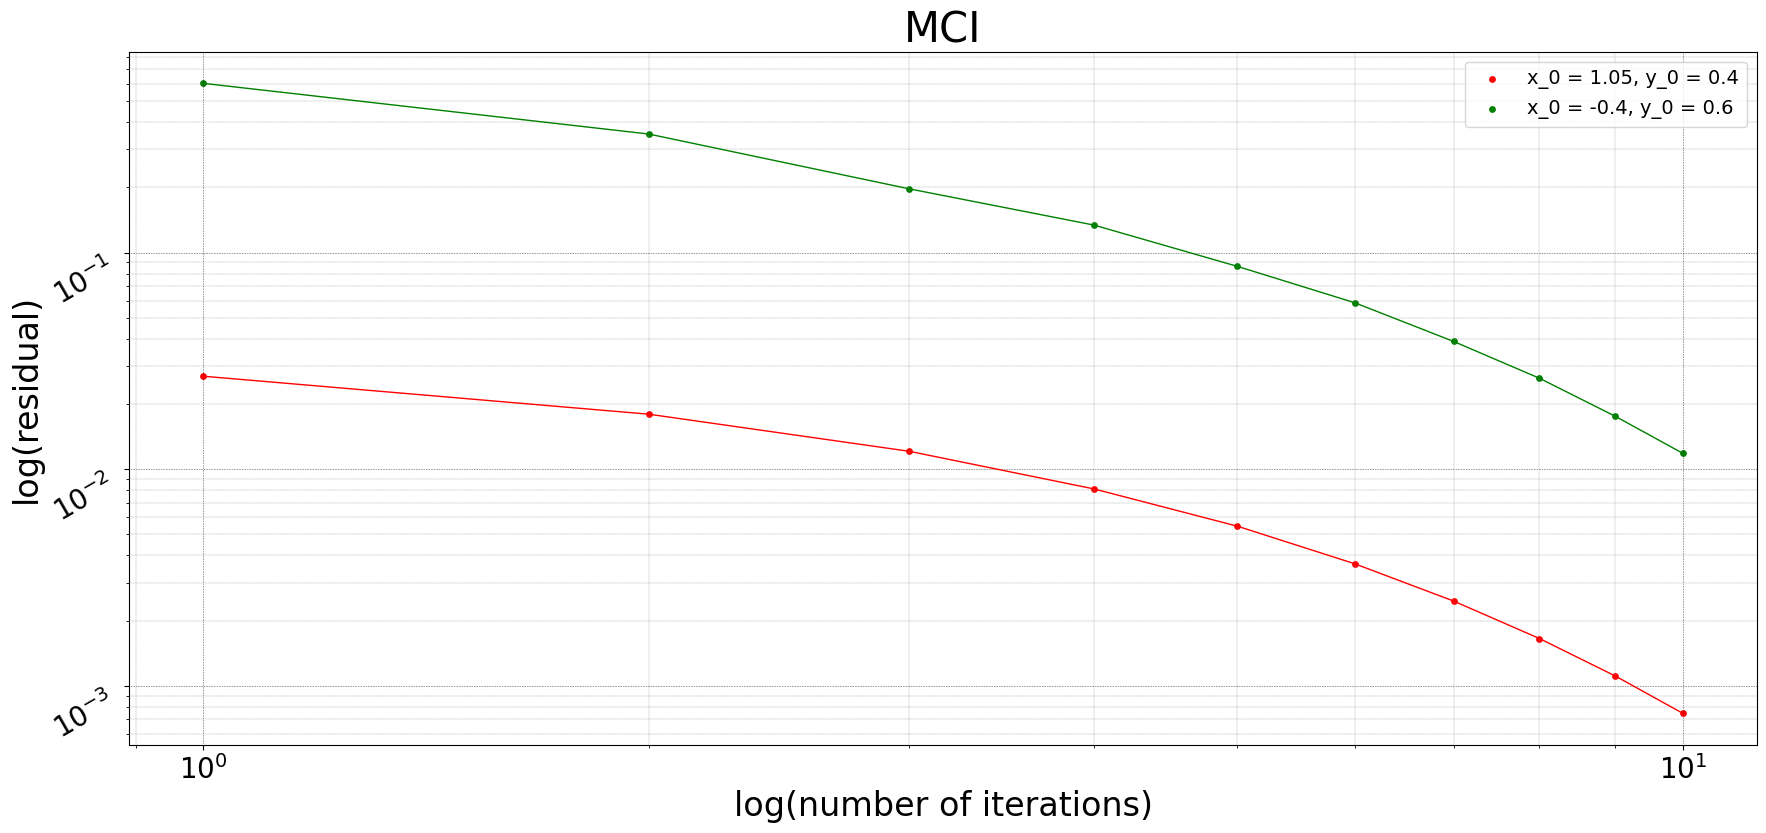

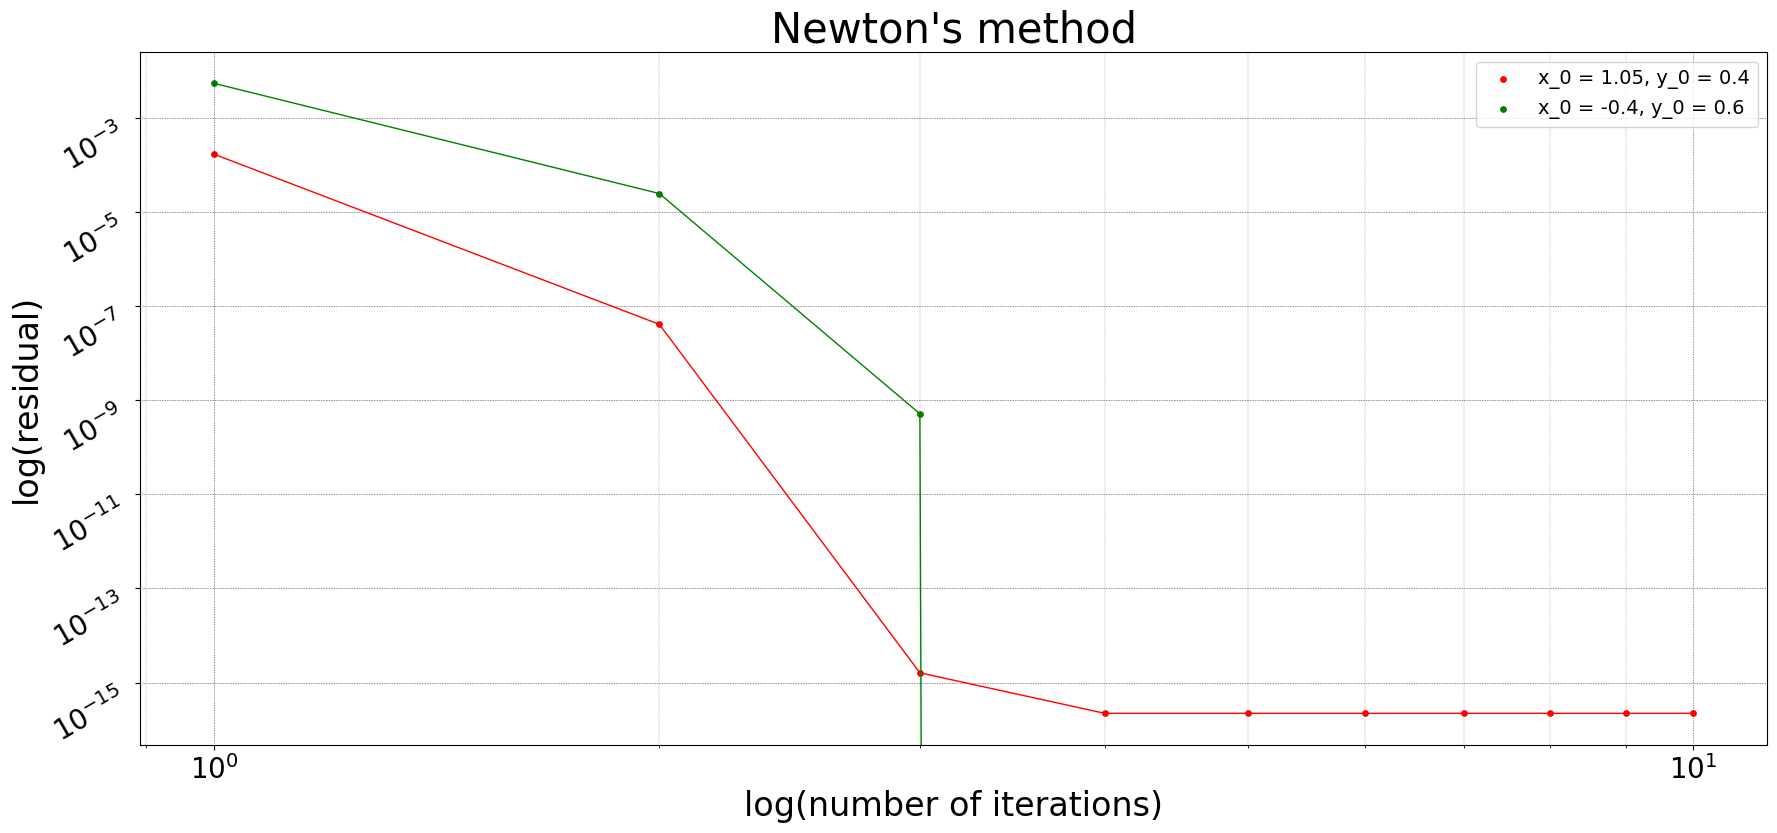

In [6]:
def norm_1 (obj):
    return np.linalg.norm(obj, ord = np.inf)

class Iter_Method_For_System:
    def __init__(self, f, g, x_0, y_0, color):
        self.f_ = f
        self.g_ = g
        self.x_0_ = x_0
        self.y_0_ = y_0
        self.color_ = color

class Newtons_Method_For_System:
    def __init__(self, x_0, y_0, color):
        self.x_0_ = x_0
        self.y_0_ = y_0
        self.color_ = color

def system_residual_for_iteration (f, g, x_0, y_0, n_iters):
    res = MCI_for_system (f, g, x_0, y_0, n_iters)
    return norm_1 (MCI_for_system(f, g, res[0], res[1], 1) - res)

def system_residual_for_newton (x_0, y_0, n_iters):
    res = newtons_method_for_system(x_0, y_0, n_iters)
    return norm_1 (newtons_method_for_system(res[0], res[1], 1) - res)

def dump_MCI_for_system (n_iters):

    roots = [Iter_Method_For_System(positive_new_x, new_y, 1.05, 0.4, "red"),
             Iter_Method_For_System(negative_new_x, new_y, -0.4, 0.6, "green")]
    iters = np.arange(1, n_iters + 1)
    for root in roots:
        residuals = []
        for i in iters:
            residuals.append(system_residual_for_iteration(root.f_, root.g_, root.x_0_, root.y_0_, i))

        plt.scatter (iters, residuals, s = 15, color = root.color_, label=f"x_0 = {root.x_0_}, y_0 = {root.y_0_}")
        plt.plot (iters, residuals, color=root.color_, linewidth = 1)

def dump_newtons_method_for_system (n_iters):

    roots = [Newtons_Method_For_System(1.05, 0.4, "red"),
             Newtons_Method_For_System(-0.4, 0.6, "green")]
    iters = np.arange(1, n_iters + 1)
    for root in roots:
        residuals = []
        for i in iters:
            residuals.append(system_residual_for_newton(root.x_0_, root.y_0_, i))

        plt.scatter (iters, residuals, s = 15, color = root.color_, label=f"x_0 = {root.x_0_}, y_0 = {root.y_0_}")
        plt.plot (iters, residuals, color=root.color_, linewidth = 1)

def show_results(method_name, dump_func, n_iters):

    plt.figure (figsize = (21, 9), dpi = 100)
    plt.title(method_name, fontsize=30)

    plt.xscale("log")
    plt.yscale("log")

    plt.xlabel("log(number of iterations)", fontsize = 24)
    plt.xticks (fontsize = 20, ha = "center", va = "top")

    plt.ylabel("log(residual)", fontsize = 24)
    plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

    dump_func(n_iters)

    plt.legend (loc = "best", fontsize = 14)

    plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
    plt.minorticks_on()
    plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

    plt.show()

print ("MCI:")
X = MCI_for_system(positive_new_x, new_y, 1.05, 0.4, 10)
print (f"- (x_0, y_0) = (1.05, 0.4) ==> (x, y) = {X[0], X[1]}")
X = MCI_for_system(negative_new_x, new_y, -0.4, 0.6, 10)
print (f"- (x_0, y_0) = (-0.4, 0.6) ==> (x, y) = {X[0], X[1]}")

print ("Newton's method:")
X = newtons_method_for_system(1.05, 0.4, 10)
print (f"- (x_0, y_0) = (1.05, 0.4) ==> (x, y) = {X[0], X[1]}")
X = newtons_method_for_system(-0.4, 0.6, 10)
print (f"- (x_0, y_0) = (-0.4, 0.6) ==> (x, y) = {X[0], X[1]}")

show_results("MCI", dump_MCI_for_system, 10)
show_results("Newton's method", dump_newtons_method_for_system, 10)